<a href="https://colab.research.google.com/github/mattany/IML/blob/main/problem_set_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [60]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)

2.b. It's interesting how similar the ouptut of the perceptron on the first and second training sets is.

Draw the axes:

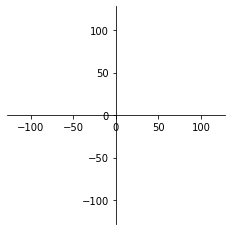

In [61]:
pos_dist_size = 2**7
def plot_axes():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.xlim(-pos_dist_size, pos_dist_size)
    plt.ylim(-pos_dist_size, pos_dist_size)
    plt.gca().set_aspect('equal', adjustable='box')

    # Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')

    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
plot_axes()

Draw a random line:

In [62]:
def random_hyperplane(d):
    plane = pos_dist_size * 2 * np.random.random_sample(size=(d, d)) - pos_dist_size
    ones = np.empty(d)
    ones.fill(1)
    w = np.linalg.solve(plane, ones)
    w = np.append(-1, w) # Homogenize
    return w

# m, n = random_line()

    
w_star = random_hyperplane(2)

Generate the inputs:

In [63]:
def gen_inputs(n, d):
    inputs = pos_dist_size * 2 * np.random.random_sample(size=(n, d)) - pos_dist_size
    inputs = np.c_[np.ones(inputs.shape[0]), inputs] # Homogenize
    return inputs

inputs = gen_inputs(20, 2)

Evaluate the inputs and plot the outputs:

In [64]:
def evaluate_point(w, x):
    return np.dot(w, x) > 0

def evaluate_points(inputs, w):
    return [evaluate_point(w, input) for input in inputs]
 

def get_plot_coords(w):

    Xs = [-pos_dist_size, pos_dist_size, 0]
    Ys = [
        (-w[0] - w[1] * Xs[0]) / w[2],
        (-w[0] - w[1] * Xs[1]) / w[2],
        (-w[0] - w[1] * Xs[2]) / w[2]
    ]
    return Xs, Ys

outputs = evaluate_points(inputs, w_star)




def plot_outputs(w, w_star, inputs, outputs):
    plot_axes()
    red_Xs = [ inputs[i][1] for i in range(len(inputs)) if outputs[i] == 1]
    red_Ys = [ inputs[i][2] for i in range(len(inputs)) if outputs[i] == 1]
    blue_Xs = [ inputs[i][1] for i in range(len(inputs)) if outputs[i] == 0 ]
    blue_Ys = [ inputs[i][2] for i in range(len(inputs)) if outputs[i] == 0 ]
    plt.scatter(red_Xs, red_Ys, color="magenta")
    plt.scatter(blue_Xs, blue_Ys, color="turquoise")
    plt.plot(*get_plot_coords(w),  label="f - target function", color="red")
    plt.plot(*get_plot_coords(w_star), label="g - final hypothesis", color="green")
    plt.legend()

a. Converged in 3483 updates
c. f and g are visibly different


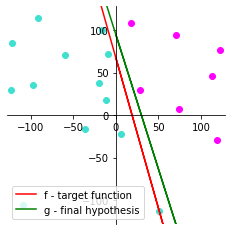

In [65]:
def get_misclassified(w, inputs, outputs):
    for i, inp in enumerate(inputs):
        if outputs[i] ^ (np.dot(w, inp) > 0):
            return i
    return -1


def perceptron(inputs, outputs):
    shape = np.shape(inputs[0])
    w = np.zeros(shape)
    misclassified = get_misclassified(w, inputs, outputs)
    steps = 0
    misses, prev_misses = 0, 0
    done = False
    while not done:
        done = True
        for i, inp in enumerate(inputs):
            res_i = np.dot(w, inp) > 0
            if outputs[i] ^ res_i:
                done = False
                y_i = 1 if outputs[i] else -1
                w += y_i * inp   
                steps +=1
                if steps %10000 == 0:
                    print(steps, misses - prev_misses, misses)
                    prev_misses = misses
            else:
                misses += 1
    print(f"a. Converged in {steps} updates")
    return w

w = perceptron(inputs, outputs)
plot_outputs(w, w_star, inputs, outputs)
print(f"c. f and g are visibly different")

2.a.a-c can be seen above. Now we generate test data and calculate the error.

Generate some test data:

In [66]:
test_inputs = gen_inputs(100, 2)


2.a.d.

In [67]:

def calculate_error(test_inputs, w, w_star):
    n = len(test_inputs)
    test_outputs = evaluate_points(test_inputs, w_star)
    actual_outputs = evaluate_points(test_inputs, w)
    return sum([test_outputs[i] ^ actual_outputs[i] for i in range(n)]) / 200

print(f"d. f and g disagree on {calculate_error(test_inputs, w, w_star)} of the points")

d. f and g disagree on 0.045 of the points


2.b. It's interesting how similar the ouptut of the perceptron on the first and second training sets is.

In [68]:
b_inputs = gen_inputs(20, 2)
b_outputs = evaluate_points(b_inputs, w_star)

a. Converged in 2638 updates
c. f and g are visibly different
d. f and g disagree on 0.055 of the points


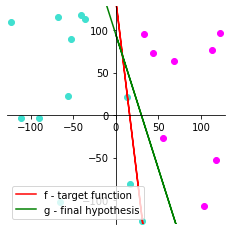

In [69]:

b_w = perceptron(b_inputs, b_outputs)
plot_outputs(b_w, w_star, b_inputs, b_outputs)
print(f"c. f and g are visibly different")
print(f"d. f and g disagree on {calculate_error(test_inputs, b_w, w_star)} of the points")

2.c. The time to converge grew a lot, and the result is more accurate.

In [70]:
c_inputs = gen_inputs(100, 2)
c_outputs = evaluate_points(c_inputs, w_star)

a. Converged in 4067 updates
c. f and g are much closer than before.
d. f and g disagree on 0.01 of the points


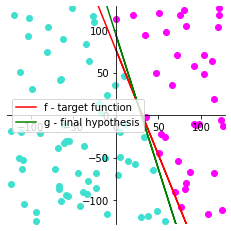

In [71]:

c_w = perceptron(c_inputs, c_outputs)
plot_outputs(c_w, w_star, c_inputs, c_outputs)
print(f"c. f and g are much closer than before.")
print(f"d. f and g disagree on {calculate_error(test_inputs, c_w, w_star)} of the points")

2.d. The time to converge grew marginally more, and now the lines are nearly indistinguishable.



In [72]:
d_inputs = gen_inputs(1000, 2)
d_outputs = evaluate_points(d_inputs, w_star)

a. Converged in 7902 updates
c. f and g are almost the same.
d. f and g disagree on 0.0 of the points


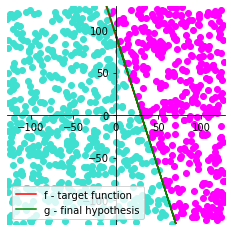

In [73]:
d_w = perceptron(d_inputs, d_outputs)
plot_outputs(d_w, w_star, d_inputs, d_outputs)
print(f"c. f and g are almost the same.")
print(f"d. f and g disagree on {calculate_error(test_inputs, d_w, w_star)} of the points")

2.e. Randomized perceptron

In [74]:
e_w_star = random_hyperplane(10)
e_inputs = gen_inputs(1000, 10)

In [76]:
# def get_next_misclassified(w, inputs, outputs):
#     for i in range(np.random.randint(1000)):

#     all_indexes = np.arange(len(inputs))
#     misclassified = np.fromiter((x for x in all_indexes if evaluate_point(w, inputs[x]) == outputs[x]), dtype=all_indexes.dtype)
#     np.random.shuffle(misclassified)
#     return misclassified[0]

# def perceptron_random(inputs, outputs):
#     n = len(inputs)
#     shape = np.shape(inputs[0])
#     w = np.zeros(shape)
#     misclassified = get_next_misclassified(w, inputs, outputs)
#     steps = 0
#     misses = 0
#     while misclassified.size:
#         for index in misclassified:
#             while outputs[index] * np.dot(w, x) < 0: 
#                 w += outputs[misclassified] * inputs[misclassified]
#                 steps += 1
#                 if steps % 10000 == 0:
#                     print(steps, misses)
#                     misses = 0
#             else:
#                 misses += 1
#         misclassified = get_next_misclassified(w, inputs, outputs)

#     print(f"a. Converged in {steps} updates")
#     return w

e_outputs = evaluate_points(e_inputs, e_w_star)
perceptron(e_inputs, e_outputs)

10000 133820 133820
20000 163744 297564
30000 199180 496744
40000 231607 728351
50000 260675 989026
60000 287787 1276813
70000 322983 1599796
80000 357238 1957034
90000 391031 2348065
100000 429721 2777786
110000 469571 3247357
120000 493811 3741168
130000 531628 4272796
140000 558576 4831372
150000 591780 5423152
160000 617634 6040786
170000 641921 6682707
180000 670492 7353199
190000 680980 8034179
200000 701193 8735372
210000 734066 9469438
220000 738300 10207738
230000 756461 10964199
240000 778384 11742583
250000 811230 12553813
260000 814894 13368707
270000 839933 14208640
280000 857798 15066438
a. Converged in 282803 updates


array([-89093.        ,   -952.04357721,  -3205.49207844,   -176.35192421,
         4742.54806153,    157.15920775,  -2169.74508428,   -354.76911647,
         1077.79257035,   -820.31245224,   3005.25985527])